In [7]:
from torchtext.data import Iterator
import sentencepiece as spm
from torchtext.data import Field, TabularDataset
from collections import Counter, OrderedDict
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
### englisgh wordpiece model gen.

In [10]:
templates = '--input={} --model_prefix={} --vocab_size={} --control_symbols=[CLS],[SEP]\
            --user_defined_symbols=[MASK] --pad_id=0 --bos_id=1 --eos_id=2 --unk_id=3'

vocab_size = 5000
prefix = 'en'
input_file = '/home/jaehoon/JupyterNotebook/1.python3/5.2019_2_paper/dataset/de-en/train.en'
cmd = templates.format(input_file, prefix, vocab_size)

spm.SentencePieceTrainer.Train(cmd)

sp_en = spm.SentencePieceProcessor()
sp_en.Load('{}.model'.format(prefix))

True

In [ ]:
### gemerny wordpiece model gen.

In [246]:
templates = '--input={} --model_prefix={} --vocab_size={} --control_symbols=[CLS],[SEP]\
            --user_defined_symbols=[MASK] --pad_id=0 --bos_id=1 --eos_id=2 --unk_id=3'

vocab_size = 5000
prefix = 'de'
output_file = '/home/jaehoon/JupyterNotebook/1.python3/5.2019_2_paper/dataset/de-en/train.de'
cmd = templates.format(output_file, prefix, vocab_size)

spm.SentencePieceTrainer.Train(cmd)

sp_de = spm.SentencePieceProcessor()
sp_de.Load('{}.model'.format(prefix))

True

In [ ]:
### tokenize_en

In [11]:
token2idx_en = dict()
idx2token_en = dict()
wordpiece_list_en = list()
word_maxlen_en = 0
sen_maxlen_en = 0
sen_len_list_en = list()

with open(input_file, 'r', encoding='utf-8') as df:
    lines = df.readlines()
    for i, line in enumerate(lines):
        wordpiece = sp_en.EncodeAsPieces(line)
        wordidx = sp_en.EncodeAsIds(line)
        wordpiece_list_en.append(wordidx)
        sen_len_list_en.append(len(line))
        if len(line) >= sen_maxlen_en:
            sen_maxlen_en = len(line)
        for word, idx in zip(wordpiece, wordidx):
            token2idx_en[word] = idx
            idx2token_en[idx] = word
            if len(word) >= word_maxlen_en:
                word_maxlen_en = len(word)
        if i == 0:
            print("first wordpiece : {}".format(wordpiece))
            print("first wordidx : {}".format(wordidx))
            print("first sentense length : {}".format(len(line)))
            print("dictory : {}".format(token2idx_en))

first wordpiece : ['▁David', '▁G', 'al', 'lo', ':', '▁This', '▁is', '▁Bill', '▁La', 'n', 'ge', '.', '▁I', "'", 'm', '▁Da', 've', '▁G', 'al', 'lo', '.']
first wordidx : [2394, 378, 103, 342, 65, 111, 20, 2742, 874, 78, 419, 8, 17, 12, 45, 1485, 68, 378, 103, 342, 8]
first sentense length : 49
dictory : {'▁David': 2394, '▁G': 378, 'al': 103, 'lo': 342, ':': 65, '▁This': 111, '▁is': 20, '▁Bill': 2742, '▁La': 874, 'n': 78, 'ge': 419, '.': 8, '▁I': 17, "'": 12, 'm': 45, '▁Da': 1485, 've': 68}


In [6]:
print("max word length : {}".format(word_maxlen_en))
print("max sentense length : {}".format(sen_maxlen_en))
print("dictionay size : {}".format(len(token2idx_en)))
print("total number of sentense : {}".format(len(wordpiece_list_en)))

max word length : 16
max sentense length : 2688
dictionay size : 5073
total number of sentense : 196884


In [ ]:
### tokenize_gemerny

In [249]:
token2idx_de = dict()
idx2token_de = dict()
wordpiece_list_de = list()
word_maxlen_de = 0
sen_maxlen_de = 0
sen_len_list_de = list()

with open(output_file, 'r', encoding='utf-8') as df:
    lines = df.readlines()
    for i, line in enumerate(lines):
        wordpiece = sp_de.EncodeAsPieces(line)
        wordidx = sp_de.EncodeAsIds(line)
        wordpiece_list_de.append(wordidx)
        sen_len_list_de.append(len(line))
        if len(line) >= sen_maxlen_de:
            sen_maxlen_de = len(line)
        for word, idx in zip(wordpiece, wordidx):
            token2idx_de[word] = idx
            idx2token_de[idx] = word
            if len(word) >= word_maxlen_de:
                word_maxlen_de = len(word)
        if i == 0:
            print("first wordpiece : {}".format(wordpiece))
            print("first wordidx : {}".format(wordidx))
            print("first sentense length : {}".format(len(line)))
            print("dictory : {}".format(token2idx_de))

first wordpiece : ['▁David', '▁Gal', 'lo', ':', '▁Das', '▁ist', '▁Bill', '▁Lang', 'e', '.', '▁Ich', '▁bin', '▁Da', 've', '▁Gal', 'lo', '.']
first wordidx : [2945, 3275, 376, 43, 54, 17, 2918, 2984, 12, 8, 40, 192, 204, 911, 3275, 376, 8]
first sentense length : 53
dictory : {'▁David': 2945, '▁Gal': 3275, 'lo': 376, ':': 43, '▁Das': 54, '▁ist': 17, '▁Bill': 2918, '▁Lang': 2984, 'e': 12, '.': 8, '▁Ich': 40, '▁bin': 192, '▁Da': 204, 've': 911}


In [250]:
print("max word length : {}".format(word_maxlen_de))
print("max sentense length : {}".format(sen_maxlen_de))
print("dictionay size : {}".format(len(token2idx_de)))
print("total number of sentense : {}".format(len(wordpiece_list_de)))

max word length : 16
max sentense length : 3199
dictionay size : 5095
total number of sentense : 196884


In [ ]:
### max sentense length 기준으로 zero padding 해주는 함수 작성

In [282]:
source = list()
target = list()

cutoff_max_sen_len_en = find_cutoff_max_sen_len(0.1, sen_len_list_en)
cutoff_max_sen_len_de = find_cutoff_max_sen_len(0.1, sen_len_list_de)
cutoff_max_sen_len = max(cutoff_max_sen_len_en, cutoff_max_sen_len_de)

print(cutoff_max_sen_len)

for idx in range(len(wordpiece_list_en)):
    if max(len(wordpiece_list_en[idx]), len(wordpiece_list_de[idx])) <= cutoff_max_sen_len:
        source.append(np.array(wordpiece_list_de[idx]))
        target.append(np.array(wordpiece_list_en[idx]))

print(len(source))
print(len(target))
        
inputs = np.zeros([len(source), cutoff_max_sen_len], dtype=np.int32)
outputs = np.zeros([len(target), cutoff_max_sen_len], dtype=np.int32)

for idx, (x, y) in enumerate(zip(source, target)): # source english, target genmerny
    inputs[idx, :len(x)] = x
    outputs[idx, :len(y)] = y
    
print ("Source Matrix Shape (DE):", inputs.shape)
print ("Target Matrix Shape (EN):", outputs.shape)
print ()
print ('------------------------ Show the example case ------------------------')
print (inputs[0])
print (outputs[0])

print ('------------------------ Show the example case ------------------------')
print (inputs[10])
print (outputs[10])

누적 10.0%를 차지하는 sentence length 값 : 31
누적 10.0%를 차지하는 sentence length 값 : 34
34
148988
148988
Source Matrix Shape (DE): (148988, 34)
Target Matrix Shape (EN): (148988, 34)

------------------------ Show the example case ------------------------
[2945 3275  376   43   54   17 2918 2984   12    8   40  192  204  911
 3275  376    8    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[2394  378  103  342   65  111   20 2742  874   78  419    8   17   12
   45 1485   68  378  103  342    8    0    0    0    0    0    0    0
    0    0    0    0    0    0]
------------------------ Show the example case ------------------------
[ 209 1140 1204   17   10 2941   11   10 3692   76  461   60 1389 1731
   53   18   34 1998  168  124   75  214   15    8    0    0    0    0
    0    0    0    0    0    0]
[  80 4371   15   10 1395 1644    9  270   18   10  790   20 1709    7
   18  794    7  146   21   20   18   10 4011    9    8    0    0    0
    0    0    0    0

In [ ]:
### data loader 작성. torch dataloader로 만들 것

In [319]:
def dataloader(inputs, outputs, batch_size):
    
    X = DataLoader(inputs, batch_size=batch_size, drop_last=True)
    Y = DataLoader(outputs, batch_size=batch_size, drop_last=True)
    
    return X, Y

In [284]:
### sentence length variance

In [279]:
def find_cutoff_max_sen_len(cutoff_value, sen_len_list_en):
    
    count_sen_len = Counter(sen_len_list_en)
    total_count_sen_len = sum(count_sen_len.values())
    dict_count_sen_len = dict(count_sen_len)
    dict_count_sen_len = OrderedDict(sorted(dict_count_sen_len.items()))
    
    temp_count_sen_len = 0
    for k, v in dict_count_sen_len.items():
        temp_count_sen_len += v
        cdf_inv = temp_count_sen_len / total_count_sen_len
        if cdf_inv >= cutoff_value:
            cutoff_max_sen_len = k
            print("누적 {}%를 차지하는 sentence length 값 : {}".format(cutoff_value*100, cutoff_max_sen_len))
            break
            
    return cutoff_max_sen_len

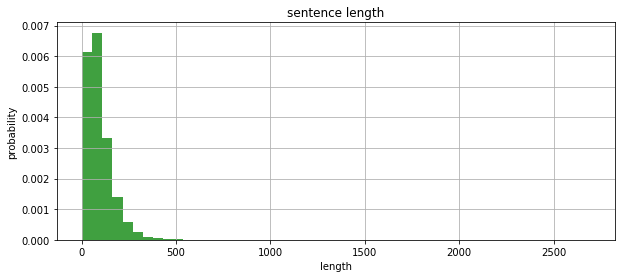

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4)

n, bins, patches = plt.hist(sen_len_en, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('probability')
plt.title('sentence length')
plt.grid(True)
plt.show()